In [2]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

state: State = {"my_age": 30}
customer_name = state.get("customer_name", None)
print(customer_name)

None


In [3]:
def node_1(state: State):
    if state.get("customer_name") is None:
        return {
            "customer_name": "John Doe"
        }
    return {}

In [7]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)

builder.add_edge(START, 'node_1')
builder.add_edge('node_1', END)

grafo = builder.compile()

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
  +--------+   
  | node_1 |   
  +--------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


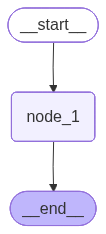

In [8]:
print(grafo.get_graph().draw_ascii())

from IPython.display import Image, display
png_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(png_bytes))


In [9]:
out=grafo.invoke(state)
print(out)

{'customer_name': 'John Doe', 'my_age': 30}
